In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
import time

In [37]:
cap = cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)

mpHand = mp.solutions.hands
hands = mpHand.Hands(max_num_hands = 1)

mpDraw = mp.solutions.drawing_utils#iskelet görünümü

In [29]:

tipIds =[4,8,12,16,20]
while True:
    success, img = cap.read()
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    results = hands.process(imgRGB)
    
    lmList = []
    if results.multi_hand_landmarks:
        for handLms in results.multi_hand_landmarks:
            mpDraw.draw_landmarks(img, handLms, mpHand.HAND_CONNECTIONS)
            for id, lm in enumerate(handLms.landmark):
                #print(id ,lm)
                h, w, c  = img.shape     
                cx, cy = int(lm.x * w) , int(lm.y * h)
                lmList.append([id,cx,cy])
                #işaret uç nokta
                #if id == 8:# enum içerisinde 0 bileğe eşit görseldeki gibi.
                #    cv2.circle(img,(cx,cy),5,(255,0,0),cv2.FILLED)
                #işaret alt nokta
                #if id == 6:# enum içerisinde 0 bileğe eşit görseldeki gibi.
                #    cv2.circle(img,(cx,cy),5,(0,0,255),cv2.FILLED)
        
    if len(lmList) != 0:
        fingers = []     
        #baş parmak
        if lmList[tipIds[0]][1] >lmList[tipIds[0]-1][1]:
            fingers.append(1)
        else:
            fingers.append(0)
         
        # 4 parmak
        for id in range(1,5):# 1 den başlıyo çünkü baş parmağı ayırıyor.      
            if lmList[tipIds[id]][2]< lmList[tipIds[id] - 2][2]:
                fingers.append(1)
            else:
                fingers.append(0)
                
        totalF = fingers.count(1)
        cv2.putText(img,"Count: " + str(int(totalF)),(30,120),cv2.FONT_HERSHEY_PLAIN, 3 ,(255,0,0),2)
    
    
    cv2.imshow("img", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()

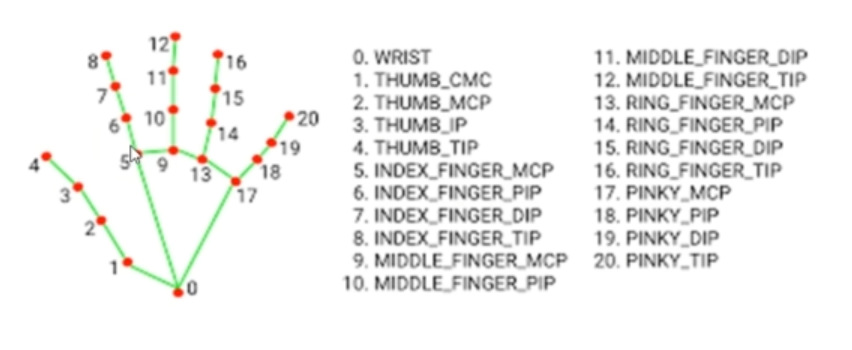

* bu koddaki en büyük sıkıntı sağ ele göre çalışıyor. Baş parmanktan kaynaklı sorun oluşuyor. Sağ ve sol el olarak ayırmak gerekli ve el yönüne göre baş parmak değerlendirilmeli.

* sağ ve sol eli tespit etmek için işaret parmağının sağında mı solunda mu eklem bölgesinden el türü tespiti yapılabilir.

### Çözülmüş hali :

In [38]:
tipIds =[4,8,12,16,20]
while True:
    success, img = cap.read()
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    results = hands.process(imgRGB)
    
    lmList = []
    if results.multi_hand_landmarks:
        for handLms in results.multi_hand_landmarks:
            mpDraw.draw_landmarks(img, handLms, mpHand.HAND_CONNECTIONS)
            for id, lm in enumerate(handLms.landmark):
                #print(id ,lm)
                h, w, c  = img.shape     
                cx, cy = int(lm.x * w) , int(lm.y * h)
                lmList.append([id,cx,cy])
                #işaret uç nokta
                #if id == 8:# enum içerisinde 0 bileğe eşit görseldeki gibi.
                #    cv2.circle(img,(cx,cy),5,(255,0,0),cv2.FILLED)
                #işaret alt nokta
                #if id == 6:# enum içerisinde 0 bileğe eşit görseldeki gibi.
                #    cv2.circle(img,(cx,cy),5,(0,0,255),cv2.FILLED)
        
    if len(lmList) != 0:
        
        
        if lmList[tipIds[4]-3][1] <lmList[tipIds[0]-2][1]:
            #sağ el
            fingers = []     
            #baş parmak
            if lmList[tipIds[0]][1] >lmList[tipIds[0]-1][1]:
                fingers.append(1)
            else:
                fingers.append(0)

            # 4 parmak
            for id in range(1,5):# 1 den başlıyo çünkü baş parmağı ayırıyor.      
                if lmList[tipIds[id]][2]< lmList[tipIds[id] - 2][2]:
                    fingers.append(1)
                else:
                    fingers.append(0)
            totalF = fingers.count(1)
            cv2.putText(img,"Right Count: " + str(int(totalF)),(30,120),cv2.FONT_HERSHEY_PLAIN, 3 ,(255,0,0),2)
        else:
            #sol el
            fingers = []     
            #baş parmak
            if lmList[tipIds[0]][1] <lmList[tipIds[0]-1][1]:
                fingers.append(1)
            else:
                fingers.append(0)

            # 4 parmak
            for id in range(1,5):# 1 den başlıyo çünkü baş parmağı ayırıyor.      
                if lmList[tipIds[id]][2]< lmList[tipIds[id] - 2][2]:
                    fingers.append(1)
                else:
                    fingers.append(0)
            totalF = fingers.count(1)
            cv2.putText(img,"Left Count: " + str(int(totalF)),(30,120),cv2.FONT_HERSHEY_PLAIN, 3 ,(255,0,0),2)
                
       
    
    
    cv2.imshow("img", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()